# Results

* Model: voxels-useganimport keras;

In [20]:
import sys
print(sys.version)

3.7.15 (default, Nov 24 2022, 18:44:54) [MSC v.1916 64 bit (AMD64)]


In [21]:
try:
    from signal import signal, SIGPIPE, SIG_DFL
    signal(SIGPIPE, SIG_DFL)
except ImportError:  # If SIGPIPE is not available (win32),
    pass  

In [24]:
#!pip install pandas
#!pip install click==7.1.2
#!pip install torch==1.8.0
#!pip install Keras==2.3.1
#!pip install scikit-learn==0.23.2
#!pip install plotly
#!pip install chart_studio
# !pip install matplotlib
# !pip install seaborn
!pip install tensorflow --upgrade --force-reinstall

  Using cached tensorflow-2.11.0-cp37-cp37m-win_amd64.whl (1.9 kB)


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\environment\lib\site-packages\pip\_internal\cli\base_command.py", line 167, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\ProgramData\Anaconda3\envs\environment\lib\site-packages\pip\_internal\cli\req_command.py", line 247, in wrapper
    return func(self, options, args)
  File "C:\ProgramData\Anaconda3\envs\environment\lib\site-packages\pip\_internal\commands\install.py", line 370, in run
    reqs, check_supported_wheels=not options.target_dir
  File "C:\ProgramData\Anaconda3\envs\environment\lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 93, in resolve
    collected.requirements, max_rounds=try_to_avoid_resolution_too_deep
  File "C:\ProgramData\Anaconda3\envs\environment\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 481, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "C:\ProgramData\Anaconda3\envs\

In [22]:
import numpy as np
import pandas as pd
from reconstruction.model import LoadModel
from reconstruction.utils.plot import plot_vol, plot_reconstruction
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\environment\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\ProgramData\Anaconda3\envs\environment\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\ProgramData\Anaconda3\envs\environment\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\ProgramData\Anaconda3\envs\environment\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\ProgramData\Anaconda3\envs\environment\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: El archivo de paginación es demasiado pequeño para completar la operación.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [7]:
#!python -m reconstruction -d modelnet10 -o data/test-vgan --epochs 1 --opt voxels-vgan --overwrite -f

In [6]:
# !python -m reconstruction -d modelnet10 -o data/test-ugan --epochs 200 --opt voxels-ugan --overwrite -f

In [18]:
#!python -m reconstruction -d modelnet10 -o data/test-usegan --epochs 1 --opt voxels-usegan --overwrite -f

In [17]:
# Load model
model = LoadModel('arq_dataset', 'data/arq_usegan_extended/', opt='voxels-usegan', evaluate_mode=True)
# Load data
model._load_full_test_set()
voxels, voxels_target, labels = model.full_test_data

NameError: name 'LoadModel' is not defined

In [14]:
results_1 = model.predict(voxels, labels)
results_2 = model.predict(results_1, labels)

def maskedl1(target, incomplete, result):
    incomplete = incomplete.reshape(-1)
    target = target.reshape(-1)[incomplete == -1]
    result = result.reshape(-1)[incomplete == -1]
    l1 = np.abs(target - result)
    return np.mean(l1)

NameError: name 'voxels' is not defined

In [85]:
result_df = pd.DataFrame()

for lbl in np.unique(labels):
    lbl_txt = model.label_encoder.inverse_transform(lbl)
    t_voxels, t_voxels_target = voxels[labels == lbl], voxels_target[labels == lbl]
    t_results_1, t_results_2 = results_1[labels == lbl], results_2[labels == lbl]
    l1_input = maskedl1(t_voxels_target, t_voxels, t_voxels)
    l1_it1 = maskedl1(t_voxels_target, t_voxels, t_results_1)
    l1_it2 = maskedl1(t_voxels_target, t_voxels, t_results_2)
    result_df.loc[lbl, 'label'] = lbl_txt
    result_df.loc[lbl, 'input_l1'] = l1_input
    result_df.loc[lbl, 'result_l1'] = l1_it1
    result_df.loc[lbl, 'result2_l1'] = l1_it2

result_df

,label,input_l1,result_l1,result2_l1
0,arq,0.022555,0.008448,0.009183
1,bathtub,0.021440,0.007727,0.008500
2,bed,0.024809,0.005768,0.006107
3,chair,0.019487,0.010198,0.011795
4,desk,0.018377,0.011930,0.018274
5,dresser,0.020895,0.003076,0.003785
6,monitor,0.019619,0.007624,0.009216
7,night_stand,0.025210,0.006637,0.011488
8,sofa,0.021283,0.006282,0.006809
9,table,0.013792,0.004365,0.005363


In [ ]:
results = pd.DataFrame()
for lbl in np.unique(labels):
    t_input = voxels[labels == lbl]
    t_target = voxels_target[labels == lbl]
    t_labels = labels[labels == lbl]
    t_result = model.predict(t_input, t_labels)
#     t_result = model.predict(t, t_labels)
    l1 = np.mean(np.abs(t_target - t_result))
    l1_original = np.mean(np.abs(t_target - t_input))
    print(model.label_encoder.inverse_transform(lbl) + ': %.4f (%.4f)' % (l1, l1_original))

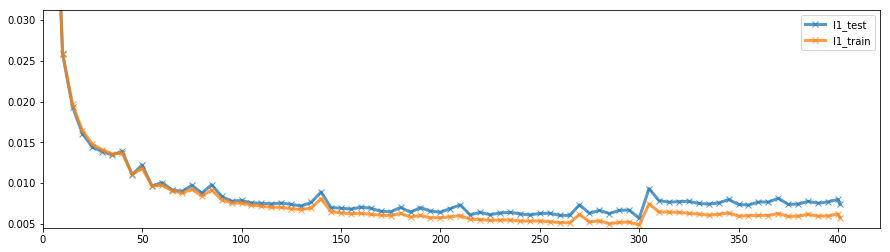

L1 loss per category (test dataset):
Loading models...
Loaded weights from files
arq: 0.0074 (0.0201)
bathtub: 0.0073 (0.0186)
bed: 0.0043 (0.0199)
chair: 0.0093 (0.0166)
desk: 0.0118 (0.0187)
dresser: 0.0021 (0.0174)
monitor: 0.0068 (0.0196)
night_stand: 0.0057 (0.0210)
sofa: 0.0065 (0.0224)
table: 0.0042 (0.0150)
toilet: 0.0098 (0.0207)


In [3]:
train_log = pd.read_csv(model.training_log_file)
plt.figure(figsize=(15,4))
plt.plot(train_log.epoch, train_log.l1_loss_test, '-x', label='l1_test', linewidth=3, alpha=.75)
plt.plot(train_log.epoch, train_log.l1_loss_train, '-x', label='l1_train', linewidth=3, alpha=.75)
plt.ylim(0.0045, 0.0312)
plt.xlim(0)
plt.legend()
plt.show()

print('L1 loss per category (test dataset):')

results = pd.DataFrame()
for lbl in np.unique(labels):
    t_input = voxels[labels == lbl]
    t_target = voxels_target[labels == lbl]
    t_labels = labels[labels == lbl]
    t_result = model.predict(t_input, t_labels)
#     t_result = model.predict(t, t_labels)
    l1 = np.mean(np.abs(t_target - t_result))
    l1_original = np.mean(np.abs(t_target - t_input))
    print(model.label_encoder.inverse_transform(lbl) + ': %.4f (%.4f)' % (l1, l1_original))


In [8]:
model._evaluate(model.full_test_data)

0.087626636

In [4]:
print(model.label_encoder.classes_)

['arq' 'bathtub' 'bed' 'chair' 'desk' 'dresser' 'monitor' 'night_stand'
 'sofa' 'table' 'toilet']


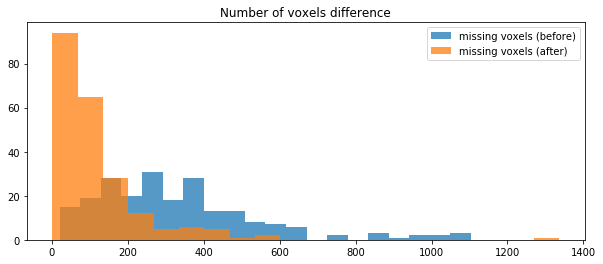

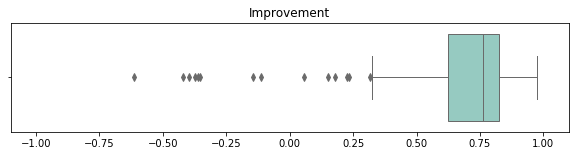

In [5]:
lbl = model.label_encoder.transform(['arq'])[0]
arq_voxels = voxels[labels == lbl]
arq_voxels_target = voxels_target[labels == lbl]
arq_labels = labels[labels == lbl]
arq_result = model.predict(arq_voxels, arq_labels)
# Voxels original difference
voxels_diff = np.logical_xor(arq_voxels_target > 0, arq_voxels > 0)
voxels_diff = voxels_diff.reshape([arq_voxels.shape[0], -1])
voxels_diff = np.sum(voxels_diff, 1)
# Voxels result difference
voxels_result_diff = np.logical_xor(arq_voxels_target > 0, arq_result > 0)
voxels_result_diff = voxels_result_diff.reshape([arq_result.shape[0], -1])
voxels_result_diff = np.sum(voxels_result_diff, 1)
plt.figure(figsize=(10,4))
plt.hist(voxels_diff, bins=20, alpha=.75, label='missing voxels (before)')
plt.hist(voxels_result_diff, bins=20, alpha=.75, label='missing voxels (after)')
plt.title('Number of voxels difference')
plt.legend()
plt.show()
# Show improvement
improvement = (voxels_diff - voxels_result_diff) / voxels_diff
plt.figure(figsize=(10,2))
sns.boxplot(improvement, palette='Set3', linewidth=1, )
plt.title('Improvement')
plt.xlim(-1.1,1.1);

In [52]:
# n_points = 3
# radius = 8
# model._load_full_test_set(min_points=n_points, max_points=n_points,
#                           min_radius=radius, max_radius=radius)
model._load_full_test_set(min_points=2, max_points=5,
                          min_radius=6, max_radius=10, sphere_chance=.9)
voxels, voxels_target, labels = model.full_test_data
result = model.predict(voxels, labels)

arq_voxels, arq_voxels_target, arq_labels, arq_result = voxels, voxels_target, labels, result

In [36]:
lbl = model.label_encoder.transform(['arq'])[0]
arq_voxels = voxels[labels == lbl]
arq_voxels_target = voxels_target[labels == lbl]
arq_labels = labels[labels == lbl]
arq_result = model.predict(arq_voxels, arq_labels)

In [54]:
# from reconstruction.utils.data_prep import get_fractured

# def multiplot(i, **kwargs):
#     frac = get_fractured(arq_voxels[i], **kwargs)
#     r = model.predict(np.expand_dims(arq_voxels[i], 0), np.asarray([labels[i]]))
#     plot_reconstruction(frac, r[0]>0)

# n = arq_voxels.shape[0]
# i = np.random.choice(n) # get random index
# plot_vol(arq_voxels_target[i])
# multiplot(i)
# multiplot(i)

Complete object:


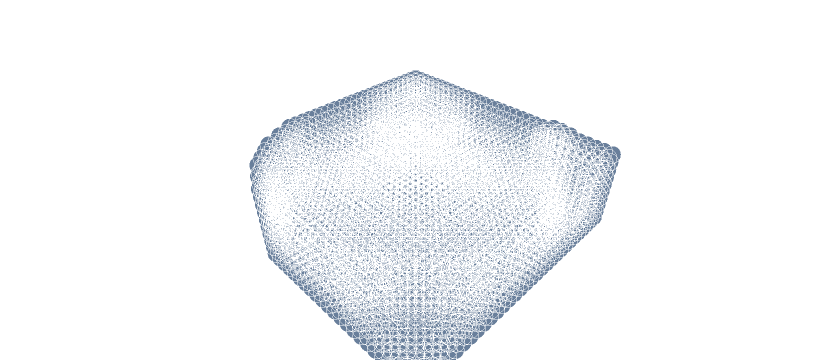

Fractured object (l1=0.1426):
Missing voxels: 2336 (55.29%)


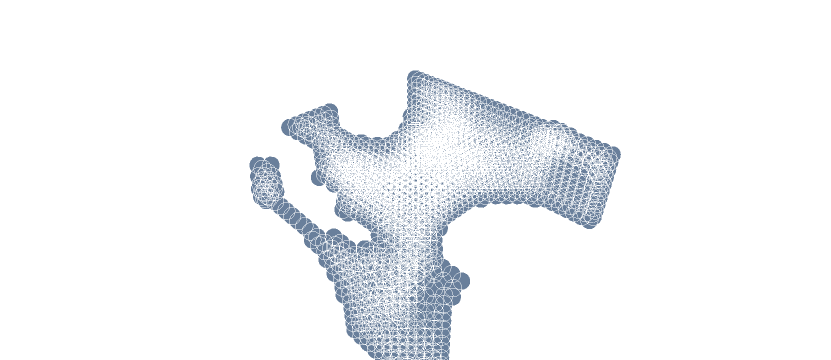

Reconstruction (l1=0.0983):
Missing voxels    : 2336 -> 331
Extra voxels added: 1262


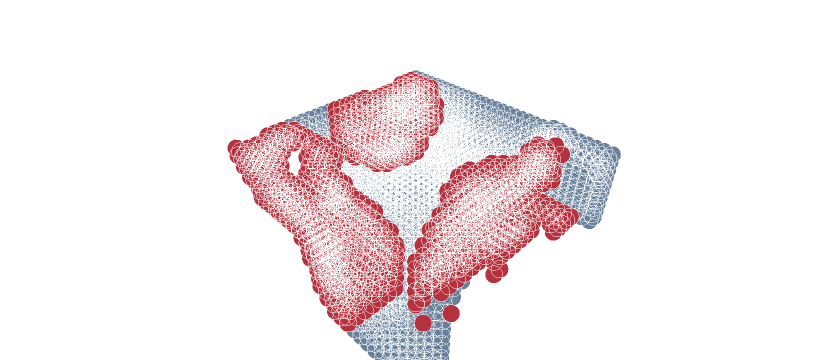

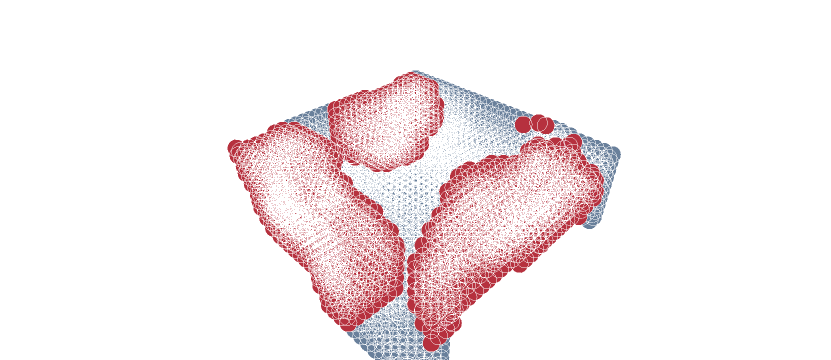

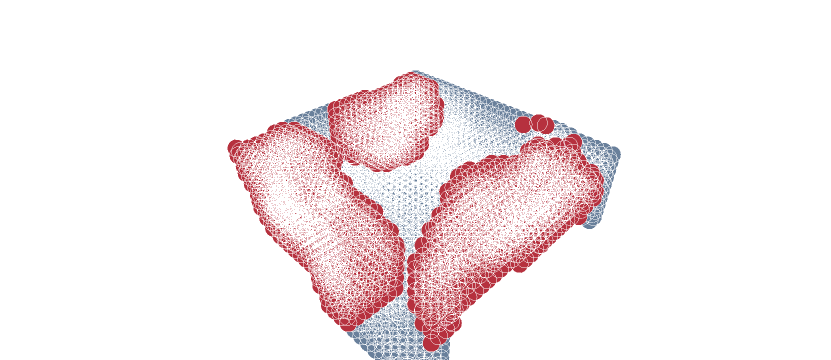

In [67]:
l1loss = lambda a, b: np.mean(np.abs(a - b))
n = arq_voxels.shape[0]

# Uncomment the desire choice
i = np.random.choice(n) # get random index
# i = np.random.choice(np.argsort(improvement)[::-1][:int(n*.07)]) # get good result
# i = np.random.choice(np.argsort(improvement)[:int(n*.07)]) # get bad result

print('Complete object:')
plot_vol(arq_voxels_target[i])
n_voxels_target = np.sum(arq_voxels_target[i] == 1)

size = 10
print('Fractured object (l1=%.4f):' % l1loss(arq_voxels_target[i], arq_voxels[i]))
n_voxels = np.sum(arq_voxels[i] == 1)
missing_points = n_voxels_target - n_voxels
perc_missing = missing_points * 100 / n_voxels_target
print(f'Missing voxels: {missing_points} (%.2f%%)' % perc_missing)
plot_vol(arq_voxels[i], s=size)

print('Reconstruction (l1=%.4f):' % l1loss(arq_voxels_target[i], arq_result[i]))
missing_points_result = np.sum((arq_voxels_target[i] + (arq_result[i] > 0)) == 0)
extra_points = np.sum((arq_voxels_target[i] + (arq_result[i] > 0)) == 1)
print(f'Missing voxels    : {missing_points} -> {missing_points_result}')
print(f'Extra voxels added: {extra_points}')
plot_reconstruction(arq_voxels[i], arq_result[i], s=size)
# plot_reconstruction(arq_voxels[i], arq_voxels_target[i], s=size)
rerecon = model.predict_one(arq_result[i], 'arq', decode_label=True)
plot_reconstruction(arq_voxels[i], rerecon[0], s=size)
rererecon = model.predict_one(arq_result[i], 'arq', decode_label=True)
plot_reconstruction(arq_voxels[i], rererecon[0], s=size)

In [100]:
# n = voxels.shape[0]

# # Uncomment the desire choice
# i = np.random.choice(n) # get random index
# # i = np.random.choice(np.argsort(improvement)[::-1][:int(n*.07)]) # get good result
# # i = np.random.choice(np.argsort(improvement)[:int(n*.07)]) # get bad result

# print(f'Complete object ({model.label_encoder.inverse_transform(labels[i])}):')
# plot_vol(voxels_target[i])

# size = 10
# print('Fractured object (l1=%.4f):' % l1loss(voxels_target[i], voxels[i]))
# missing_points = np.sum((voxels_target[i] - voxels[i]))
# print(f'Missing voxels: {missing_points}')
# plot_vol(voxels[i], s=size)

# print('Reconstruction (l1=%.4f):' % l1loss(voxels_target[i], result[i]))
# missing_points_result = np.sum((voxels_target[i] + (result[i] > 0)) == 0)
# extra_points = np.sum((voxels_target[i] + (result[i] > 0)) == 1)
# print(f'Missing voxels    : {missing_points} -> {missing_points_result}')
# print(f'Extra voxels added: {extra_points}')
# plot_reconstruction(voxels[i], result[i], s=size)